# Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining 
# how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
# Forecasting.


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

In [62]:
#load the libraries
import pandas as pd
import numpy as np
import pandas_profiling as pp
import sweetviz as sv

In [63]:
coca = pd.read_csv("C:/Users/RajabhishekAditya/Downloads/forecasting/CocaCola.csv")
#coca.CocaCola.plot()
#coca

In [64]:
coca

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [65]:
#Data Structure 
type(coca)
coca.shape

(42, 2)

In [66]:
#data types
coca.dtypes

Quarter     object
Sales      float64
dtype: object

In [67]:
coca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [68]:
coca.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714246
50%,2782.376999
75%,3609.250000
max,5253.000000


C:\Users\RajabhishekAditya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.630162
Kurtosis: -0.584372


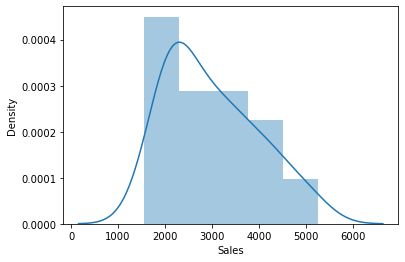

In [69]:
sns.distplot(coca['Sales'])
#skewness and kurtosis
print("Skewness: %f" % coca.skew())
print("Kurtosis: %f" % coca.kurt())

In [70]:
corr = coca.corr()
corr.sort_values(["Sales"], ascending = False, inplace = True)
print(corr.Sales)

Sales    1.0
Name: Sales, dtype: float64


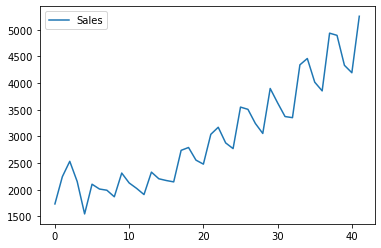

In [71]:
coca.plot()
pyplot.show()

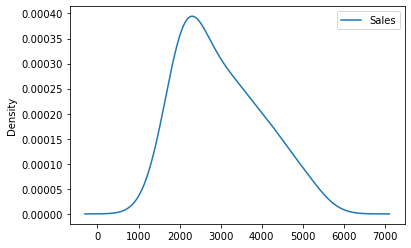

In [72]:
from pandas.plotting import lag_plot
coca.plot(kind='kde')
pyplot.show()

<AxesSubplot:xlabel='Quarter', ylabel='Sales'>

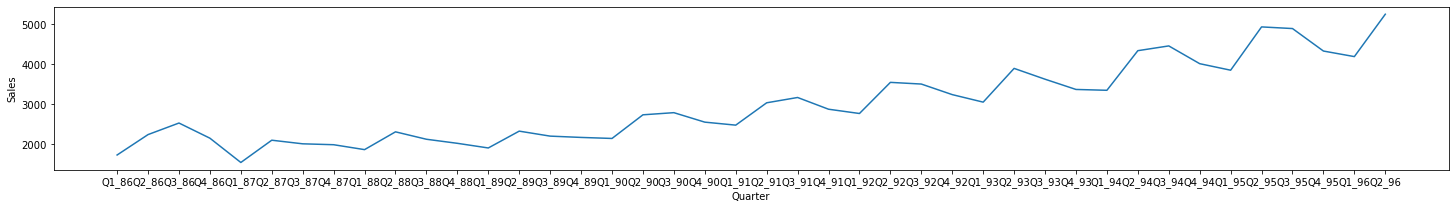

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,3))
sns.lineplot(x="Quarter",y="Sales",data=coca)

In [75]:
import numpy as np
quarter=['Q1','Q2','Q3','Q4']
n=coca['Quarter'][0]
n[0:2]

coca['quarter']=0

for i in range(42):
    n=coca['Quarter'][i]
    coca['quarter'][i]=n[0:2]
    
dummy=pd.DataFrame(pd.get_dummies(coca['quarter']))

coco=pd.concat((coca,dummy),axis=1)
t= np.arange(1,43)
coco['t']=t
coco['t_square']=coco['t']*coco['t']
coco

<ipython-input-75-6d5dfc227f7c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coca['quarter'][i]=n[0:2]
C:\Users\RajabhishekAditya\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100


In [76]:
coco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Quarter   42 non-null     object 
 1   Sales     42 non-null     float64
 2   quarter   42 non-null     object 
 3   Q1        42 non-null     uint8  
 4   Q2        42 non-null     uint8  
 5   Q3        42 non-null     uint8  
 6   Q4        42 non-null     uint8  
 7   t         42 non-null     int32  
 8   t_square  42 non-null     int32  
dtypes: float64(1), int32(2), object(2), uint8(4)
memory usage: 1.6+ KB


<AxesSubplot:>

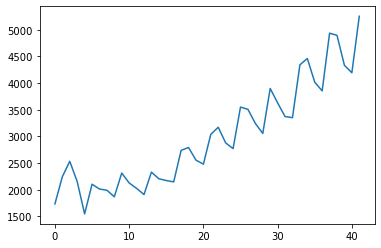

In [77]:
log_Sales=np.log(coco['Sales'])
coco['log_Sales']=log_Sales

train= coco.head(38)
test=coco.tail(4)
coco.Sales.plot()

In [124]:
#Linear Model
import statsmodels.formula.api as smf 

#linear model
linear= smf.ols('Sales~t',data=train).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmselin=np.sqrt((np.mean(np.array(test['Sales'])-np.array(predlin))**2))
rmselin


421.17878763677913

In [125]:
#quadratic model
quad=smf.ols('Sales~t+t_square',data=train).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test[['t','t_square']])))
rmsequad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predquad))**2))
rmsequad

475.5618351982028

In [126]:
#exponential model
expo=smf.ols('log_Sales~t',data=train).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test['t'])))
predexp
rmseexpo=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo


466.24797313210684

In [127]:
#additive seasonality
additive= smf.ols('Sales~ Q1+Q2+Q3+Q4',data=train).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
predadd
rmseadd=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predadd))**2))
rmseadd

1860.0238154374442

In [128]:
#additive seasonality with linear trend
addlinear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test[['t','Q1','Q2','Q3','Q4']])))
predaddlinear
rmseaddlinear=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear

464.9829024280397

In [129]:
#additive seasonality with quadratic trend
addquad=smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test[['t','t_square','Q1','Q2','Q3','Q4']])))
rmseaddquad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predaddquad))**2))
rmseaddquad

301.7380072146158

In [130]:
#multiplicative seasonality
mulsea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
rmsemul= np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul


1963.38964005634

In [131]:
#multiplicative seasonality with linear trend
mullin= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=train).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test[['t','Q1','Q2','Q3','Q4']])))
rmsemulin=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predmullin)))**2))
rmsemulin

225.52439056170334

In [132]:
#multiplicative seasonality with quadratic trend
mul_quad= smf.ols('log_Sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test[['t','t_square','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad


581.845718923512

In [133]:
#Compare the results 

data = {"MODEL":pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,Values
0,rmse_mul_quad,581.845719
1,rmseadd,1860.023815
2,rmseaddlinear,464.982902
3,rmseaddquad,301.738007
4,rmseexpo,466.247973
5,rmselin,421.178788
6,rmsemul,1963.389640
7,rmsemulin,225.524391
8,rmsequad,475.561835


In [134]:
#Build the model on entire data set
model_full = smf.ols('Sales~Quarter',data=coco).fit()

In [135]:
model_full

In [136]:
pred_new  = pd.Series(mullin.predict(coco))
pred_new

0     7.345823
1     7.587884
2     7.574280
3     7.498859
4     7.440236
5     7.682297
6     7.668693
7     7.593272
8     7.534649
9     7.776710
10    7.763106
11    7.687685
12    7.629062
13    7.871123
14    7.857519
15    7.782098
16    7.723475
17    7.965536
18    7.951932
19    7.876511
20    7.817889
21    8.059949
22    8.046345
23    7.970924
24    7.912302
25    8.154362
26    8.140758
27    8.065338
28    8.006715
29    8.248776
30    8.235171
31    8.159751
32    8.101128
33    8.343189
34    8.329584
35    8.254164
36    8.195541
37    8.437602
38    8.423998
39    8.348577
40    8.289954
41    8.532015
dtype: float64

In [137]:
coco["forecasted_Sales"] = pd.Series(pred_new)

In [138]:
coco

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales,forecasted_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663,7.345823
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443,7.587884
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477,7.574280
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529,7.498859
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602,7.440236
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791,7.682297
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058,7.668693
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767,7.593272
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186,7.534649
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574,7.776710


In [139]:
#data driven model for cocacola
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [140]:
coca = pd.read_csv("C:/Users/RajabhishekAditya/Downloads/forecasting/CocaCola.csv")
#coca.CocaCola.plot()
#coca

In [141]:
coca

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


<AxesSubplot:>

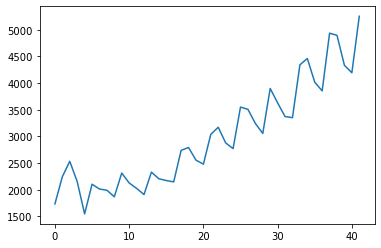

In [143]:
coca.Sales.plot()

In [145]:
#splitting data
Train = coca.head(38)
Test = coca.tail(4)

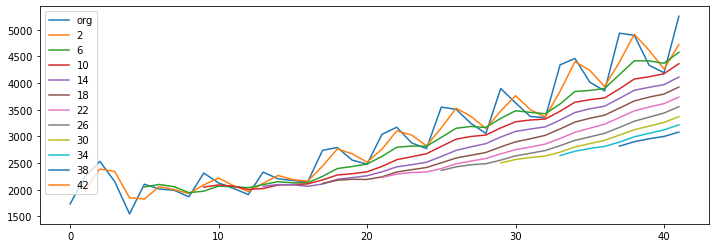

In [146]:
#moving average
plt.figure(figsize=(12,4))
coca.Sales.plot(label="org")
for i in range(2,46,4): # 4 is difference
    coca["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

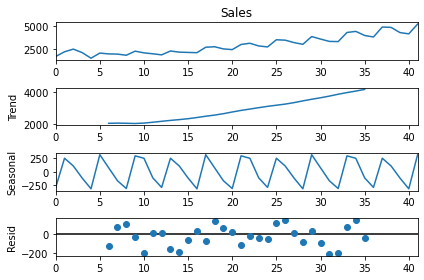

In [147]:
#Time Series Decomposition Plot
decompose_ts_add = seasonal_decompose(coca.Sales,period=12)
decompose_ts_add.plot()
plt.show()

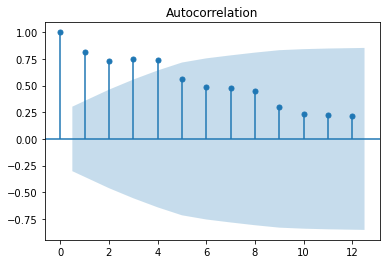

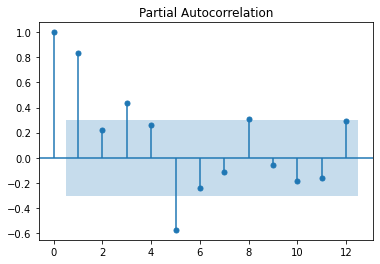

In [148]:
#ACF AND PACF PLOTS
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(coca.Sales,lags=12)
tsa_plots.plot_pacf(coca.Sales,lags=12)
plt.show()


In [149]:
# Evaluate metric MAPE
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [150]:
# simple exponenrial method
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) 


C:\Users\RajabhishekAditya\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


13.169736669204188

In [151]:
#Holt Method
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 

<ipython-input-151-98735049364b>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


12.361934175245395

In [152]:
### Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales) 

5.183646152875718

In [153]:
### Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

2.8210826604373076

In [155]:
## Final Model by combining train and test
hwe_model_add_add = ExponentialSmoothing(coca["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()


In [156]:
#Forecasting for next 20 time periods
hwe_model_add_add.forecast(20)

42    4921.447580
43    4588.028784
44    4532.565323
45    5757.516576
46    5816.510843
47    5209.024968
48    4956.941695
49    6238.284440
50    6082.913182
51    5456.477015
52    5257.401248
53    6548.328773
54    6115.799859
55    5679.394609
56    5589.781039
57    7074.845328
58    7122.437732
59    6357.078577
60    6029.733557
61    7564.469244
dtype: float64

# FOR AIRLINES PASSANGER DATASET

In [170]:
import pandas as pd
import seaborn as sns
from pandas import read_excel
from matplotlib import pyplot

In [182]:
data = read_excel('C:/Users/RajabhishekAditya/Downloads/forecasting/Airlines+Data.xlsx')
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [183]:
data.columns

Index(['Month', 'Passengers'], dtype='object')

In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [185]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


C:\Users\RajabhishekAditya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness: 0.637375
kurtosis: -0.128121


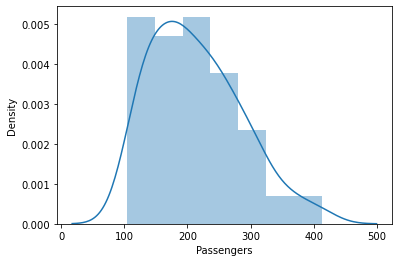

In [186]:
sns.distplot(data['Passengers'])
print("skewness: %f" % data.skew())
print("kurtosis: %f" % data.kurt())

In [187]:
corr = data.corr()
corr.sort_values(["Passengers"], ascending = False, inplace = True)

print(corr.Passengers)

Passengers    1.0
Name: Passengers, dtype: float64


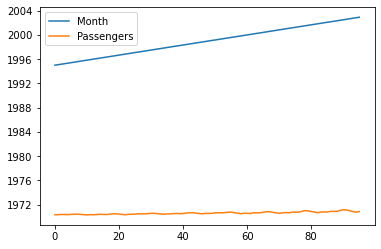

In [188]:
data.plot()
pyplot.show()

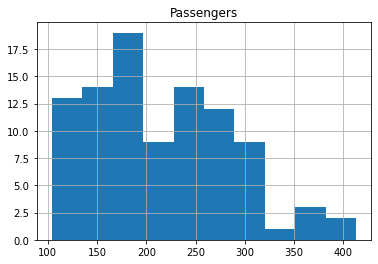

In [189]:
data.hist()
pyplot.show()

<AxesSubplot:xlabel='Month', ylabel='Passengers'>

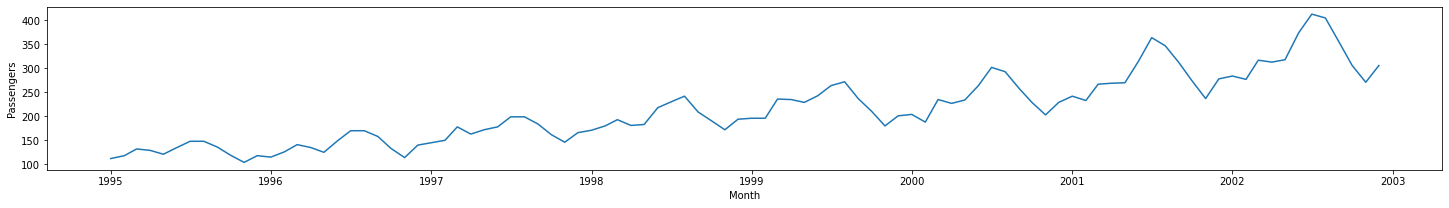

In [190]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,3))
sns.lineplot(x="Month",y="Passengers",data=data)

In [191]:
data["Date"] = pd.to_datetime(data.Month,format="%b-%y")
data["month"] = data.Date.dt.strftime("%b") # month extraction
data["year"] = data.Date.dt.strftime("%Y") # year extraction


In [192]:
data

,Month,Passengers,Date,month,year
0,1995-01-01,112,1995-01-01,Jan,1995
1,1995-02-01,118,1995-02-01,Feb,1995
2,1995-03-01,132,1995-03-01,Mar,1995
3,1995-04-01,129,1995-04-01,Apr,1995
4,1995-05-01,121,1995-05-01,May,1995
...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002
92,2002-09-01,355,2002-09-01,Sep,2002
93,2002-10-01,306,2002-10-01,Oct,2002
94,2002-11-01,271,2002-11-01,Nov,2002


In [193]:
import numpy as np
nn=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']
n=data['month'][0]
n[0:5]

data['nn']=0

for i in range(96):
    n=data['month'][i]
    data['nn'][i]=n[0:5]
    
dummy=pd.DataFrame(pd.get_dummies(data['nn']))

mm=pd.concat((data,dummy),axis=1)
t= np.arange(1,97)
mm['t']=t
mm['t_square']=mm['t']*mm['t']
mm

<ipython-input-193-ff134166d225>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['nn'][i]=n[0:5]
C:\Users\RajabhishekAditya\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Month,Passengers,Date,month,year,nn,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square
0,1995-01-01,112,1995-01-01,Jan,1995,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1
1,1995-02-01,118,1995-02-01,Feb,1995,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4
2,1995-03-01,132,1995-03-01,Mar,1995,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9
3,1995-04-01,129,1995-04-01,Apr,1995,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16
4,1995-05-01,121,1995-05-01,May,1995,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002,Aug,0,1,0,0,0,0,0,0,0,0,0,0,92,8464
92,2002-09-01,355,2002-09-01,Sep,2002,Sep,0,0,0,0,0,0,0,0,0,0,0,1,93,8649
93,2002-10-01,306,2002-10-01,Oct,2002,Oct,0,0,0,0,0,0,0,0,0,0,1,0,94,8836
94,2002-11-01,271,2002-11-01,Nov,2002,Nov,0,0,0,0,0,0,0,0,0,1,0,0,95,9025


In [194]:
mm.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
 2   Date        96 non-null     datetime64[ns]
 3   month       96 non-null     object        
 4   year        96 non-null     object        
 5   nn          96 non-null     object        
 6   Apr         96 non-null     uint8         
 7   Aug         96 non-null     uint8         
 8   Dec         96 non-null     uint8         
 9   Feb         96 non-null     uint8         
 10  Jan         96 non-null     uint8         
 11  Jul         96 non-null     uint8         
 12  Jun         96 non-null     uint8         
 13  Mar         96 non-null     uint8         
 14  May         96 non-null     uint8         
 15  Nov         96 non-null     uint8         
 16  Oct         96 non-null     

<AxesSubplot:>

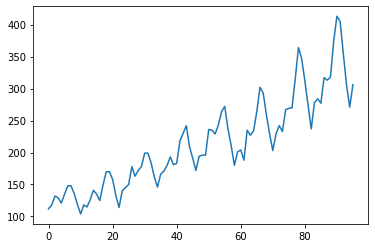

In [195]:
log_Passengers=np.log(mm['Passengers'])
mm['log_Passengers']=log_Passengers

train= mm.head(80)
test=mm.tail(16)
mm.Passengers.plot()

In [196]:
#Linear Model
import statsmodels.formula.api as smf 

#linear model
linear= smf.ols('Passengers~t',data=train).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmselin=np.sqrt((np.mean(np.array(test['Passengers'])-np.array(predlin))**2))
rmselin


17.12243319268637

In [197]:
#quadratic model
quad=smf.ols('Passengers~t+t_square',data=train).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test[['t','t_square']])))
rmsequad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predquad))**2))
rmsequad

43.6544036958425

In [198]:
#exponential model
expo=smf.ols('log_Passengers~t',data=train).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test['t'])))
predexp
rmseexpo=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(predexp)))**2))
rmseexpo


43.79373939334322

In [199]:
#additive seasonality
additive= smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])))
predadd
rmseadd=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predadd))**2))
rmseadd

129.26647641443307

In [200]:
#additive seasonality with linear trend
addlinear= smf.ols('Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test[['t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])))
predaddlinear
rmseaddlinear=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predaddlinear))**2))
rmseaddlinear

33.0457084785024

In [201]:
#additive seasonality with quadratic trend
addquad=smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test[['t','t_square','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])))
rmseaddquad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predaddquad))**2))
rmseaddquad

23.910983570106755

In [202]:
#multiplicative seasonality
mulsea=smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])))
rmsemul= np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(predmul)))**2))
rmsemul


135.32648414621102

In [203]:
#multiplicative seasonality with linear trend
mullin= smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test[['t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])))
rmsemulin=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(predmullin)))**2))
rmsemulin

9.469000230304077

In [204]:
#multiplicative seasonality with quadratic trend
mul_quad= smf.ols('log_Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test[['t','t_square','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

23.08634854615272

In [205]:
#Compare the results 

data1 = {"MODEL":pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}
table_rmse=pd.DataFrame(data1)
table_rmse

,MODEL,Values
0,rmse_mul_quad,23.086349
1,rmseadd,129.266476
2,rmseaddlinear,33.045708
3,rmseaddquad,23.910984
4,rmseexpo,43.793739
5,rmselin,17.122433
6,rmsemul,135.326484
7,rmsemulin,9.469000
8,rmsequad,43.654404


In [206]:
#Build the model on entire data set
model_full = smf.ols('Passengers~Month',data=mm).fit()

In [207]:
model_full

In [208]:
pred_new  = pd.Series(mullin.predict(mm))
pred_new

0     4.693857
1     4.709450
2     4.853814
3     4.818083
4     4.808364
        ...   
91    5.971032
92    5.861712
93    5.734631
94    5.605119
95    5.740344
Length: 96, dtype: float64

In [209]:
mm["forecasted_Sales"] = pd.Series(pred_new)

In [210]:
mm

,Month,Passengers,Date,month,year,nn,Apr,Aug,Dec,Feb,...,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers,forecasted_Sales
0,1995-01-01,112,1995-01-01,Jan,1995,Jan,0,0,0,0,...,0,0,0,0,0,0,1,1,4.718499,4.693857
1,1995-02-01,118,1995-02-01,Feb,1995,Feb,0,0,0,1,...,0,0,0,0,0,0,2,4,4.770685,4.709450
2,1995-03-01,132,1995-03-01,Mar,1995,Mar,0,0,0,0,...,0,1,0,0,0,0,3,9,4.882802,4.853814
3,1995-04-01,129,1995-04-01,Apr,1995,Apr,1,0,0,0,...,0,0,0,0,0,0,4,16,4.859812,4.818083
4,1995-05-01,121,1995-05-01,May,1995,May,0,0,0,0,...,0,0,1,0,0,0,5,25,4.795791,4.808364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002,Aug,0,1,0,0,...,0,0,0,0,0,0,92,8464,6.003887,5.971032
92,2002-09-01,355,2002-09-01,Sep,2002,Sep,0,0,0,0,...,0,0,0,0,0,1,93,8649,5.872118,5.861712
93,2002-10-01,306,2002-10-01,Oct,2002,Oct,0,0,0,0,...,0,0,0,0,1,0,94,8836,5.723585,5.734631
94,2002-11-01,271,2002-11-01,Nov,2002,Nov,0,0,0,0,...,0,0,0,1,0,0,95,9025,5.602119,5.605119


In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [212]:
data = read_excel('C:/Users/RajabhishekAditya/Downloads/forecasting/Airlines+Data.xlsx')
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


<AxesSubplot:>

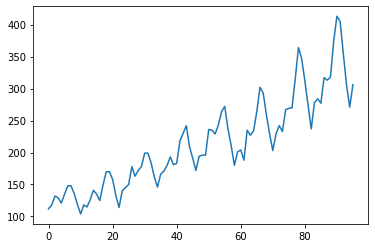

In [213]:
data.Passengers.plot()

In [214]:
#splitting data
Train = data.head(80)
Test = data.tail(16)

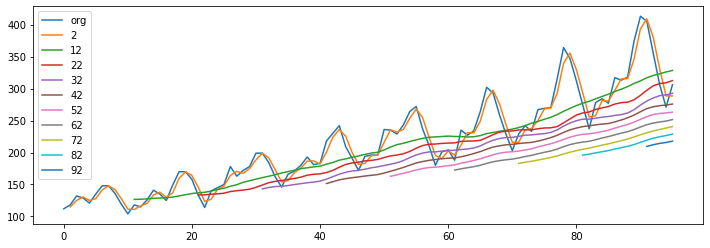

In [215]:
#moving average
plt.figure(figsize=(12,4))
data.Passengers.plot(label="org")
for i in range(2,96,10): # 10 is difference
    data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

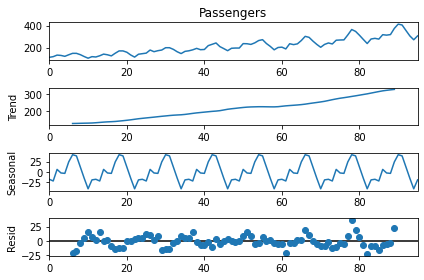

In [216]:
#Time Series Decomposition Plot
decompose_ts_add = seasonal_decompose(data.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

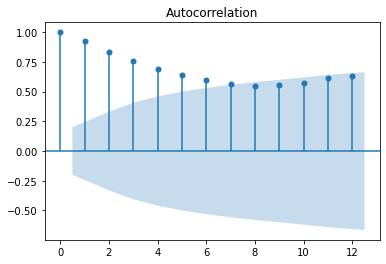

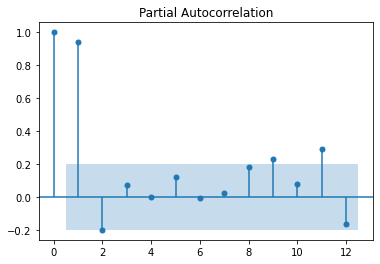

In [217]:
#ACF AND PACF PLOTS
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Passengers,lags=12)
tsa_plots.plot_pacf(data.Passengers,lags=12)
plt.show()

In [218]:
# Evaluate metric MAPE
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [219]:
# simple exponenrial method
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers) 


C:\Users\RajabhishekAditya\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


11.375850554268187

In [220]:
#Holt Method
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers) 

<ipython-input-220-490995e5c6ac>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


51.93443984363048

In [221]:
### Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

7.6099745542819575

In [222]:
### Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

3.2167504981916455

In [223]:
## Final Model by combining train and test
hwe_model_add_add = ExponentialSmoothing(data["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()


In [224]:
#Forecasting for next 20 time periods
hwe_model_add_add.forecast(20)

96     312.899164
97     308.170903
98     355.533272
99     345.770384
100    345.697110
101    392.472018
102    436.501550
103    429.860620
104    380.172862
105    332.318642
106    290.626602
107    330.591802
108    337.371414
109    332.117277
110    382.982189
111    372.294905
112    372.047562
113    422.199020
114    469.356105
115    462.013652
dtype: float64

In [225]:
series = read_excel('C:/Users/RajabhishekAditya/Downloads/forecasting/Airlines+Data.xlsx', header=0, index_col=0, parse_dates=True)
series

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


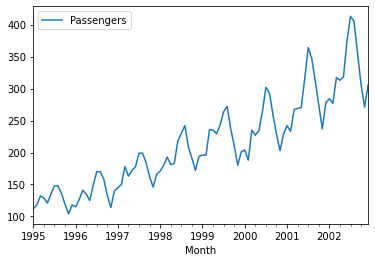

In [226]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
series.plot()
pyplot.show()

<AxesSubplot:ylabel='Density'>

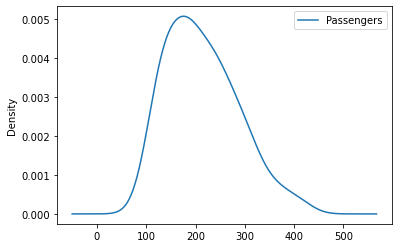

In [227]:
series.plot(kind='kde')

In [228]:
# separate out a validation dataset
split_point = len(series) - 10
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 86, Validation 10


In [229]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]


In [230]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=230.000, Expected=242.000
>Predicted=242.000, Expected=209.000
>Predicted=209.000, Expected=191.000
>Predicted=191.000, Expected=172.000
>Predicted=172.000, Expected=194.000
>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=180.000
>Predicted=180.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>Predicted=259.000, Expected=229.000
>

In [231]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [232]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [233]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=78.563
ARIMA(0, 0, 1) RMSE=44.789
ARIMA(0, 1, 0) RMSE=25.903
ARIMA(0, 1, 1) RMSE=25.355
ARIMA(0, 1, 2) RMSE=27.772
ARIMA(0, 1, 3) RMSE=23.806
ARIMA(0, 1, 4) RMSE=22.640
ARIMA(0, 2, 0) RMSE=32.474
ARIMA(0, 2, 1) RMSE=26.640
ARIMA(0, 2, 2) RMSE=25.942
ARIMA(0, 2, 3) RMSE=27.914
ARIMA(0, 2, 4) RMSE=25.151
ARIMA(1, 0, 0) RMSE=26.036
ARIMA(1, 0, 1) RMSE=25.282
ARIMA(1, 0, 2) RMSE=461.889
ARIMA(1, 1, 0) RMSE=25.679
ARIMA(1, 2, 0) RMSE=31.603
ARIMA(2, 0, 0) RMSE=25.620
ARIMA(2, 1, 0) RMSE=25.467
ARIMA(2, 2, 0) RMSE=30.414
ARIMA(3, 0, 0) RMSE=25.510
ARIMA(3, 0, 1) RMSE=24.907
ARIMA(3, 1, 0) RMSE=25.648
ARIMA(3, 2, 0) RMSE=30.597
ARIMA(4, 0, 0) RMSE=25.764
ARIMA(4, 1, 0) RMSE=25.344
ARIMA(4, 2, 0) RMSE=29.205
ARIMA(4, 2, 1) RMSE=26.016
Best ARIMA(0, 1, 4) RMSE=22.640


In [234]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [235]:
# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

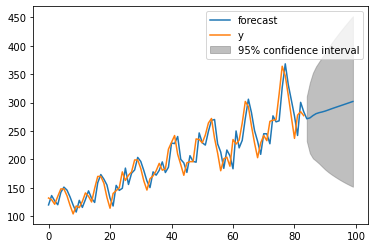

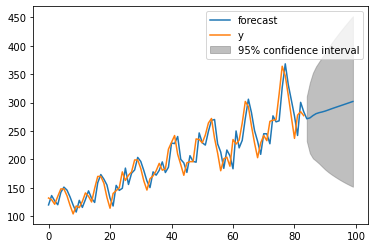

In [236]:
# fit model
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 100)

In [237]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

71.93698492463312

In [240]:
# fit model
read_excel('C:/Users/RajabhishekAditya/Downloads/forecasting/Airlines+Data.xlsx', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [241]:
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()

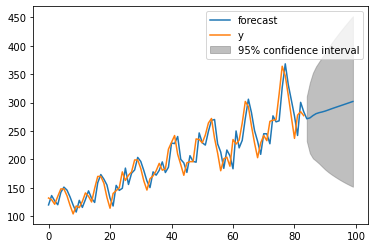

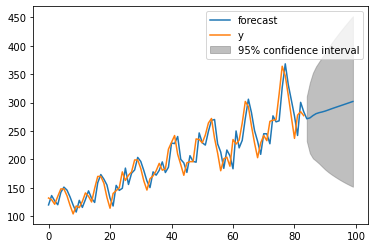

In [242]:
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,100)

In [243]:
forecast

array([271.5444422 , 272.96717823, 277.13673876, 280.43796091,
       282.22674611, 283.52404428, 285.09891935, 287.00430993,
       288.98786988, 290.89405295])